In [15]:
import cv2

# load the data 
im = cv2.imread('/content/drive/MyDrive/svt1/img/00_01.jpg')
# printing the shape using .shape
print(im.shape)
# printing the type of the image
print(type(im.shape)) 

(768, 1024, 3)
<class 'tuple'>


In [44]:
src_path="/content/drive/MyDrive/svt1/img"
dir_list= os.listdir(src_path)
dir_list.sort()



In [53]:
import tqdm
import tempfile
import os
import cv2
import numpy as np
from PIL import Image

IMAGE_SIZE = 1800
BINARY_THREHOLD = 180

import tempfile
import os
import cv2
import numpy as np
from PIL import Image

IMAGE_SIZE = 1800
BINARY_THREHOLD = 180

def process_image_for_ocr(file_path):
    temp_filename = set_image_dpi(file_path)
    im_new = remove_noise_and_smooth(temp_filename)
    return im_new
## Scaling the image
def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = max(1, int(IMAGE_SIZE / length_x))
    size = factor * length_x, factor * width_y
    # resize the image
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    return temp_filename
## Skew Correction
def image_smoothening(img):
    ret1, th1 = cv2.threshold(img, BINARY_THREHOLD, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    ## thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(th2, (1, 1), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3
# removing noise and smoothing it 
def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name, 0)
    ## filtering with adaptive threshold 
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41,
                                     3)
    
    ## using a 1x1 kernel with full of ones
    kernel = np.ones((1, 1), np.uint8)
    ##  removing noise using cv2.morphologyEx()
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    ##closing small holes inside the foreground objects
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image
src_path= r"/content/drive/MyDrive/svt1/img"
dir_list= os.listdir(src_path)
dir_list.sort()   

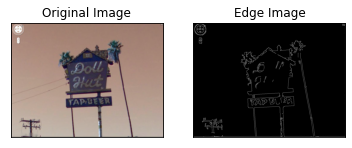

In [58]:
# edge detection using cv2.Canny()
edges = cv2.Canny(im,100,200)

## plotting the edges of the image
plt.subplot(121),plt.imshow(im,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
import tqdm
images=[]
for file_name in dir_list:
  file_name = src_path + '/' + file_name
  im_new = process_image_for_ocr(file_name)
  images.append(im_new)

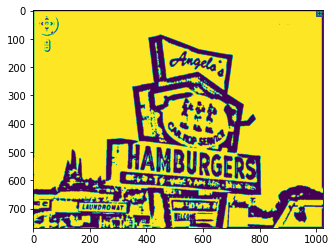

In [22]:
imshow(images[10])

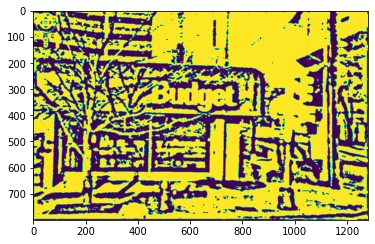

In [23]:
imshow(images[20])

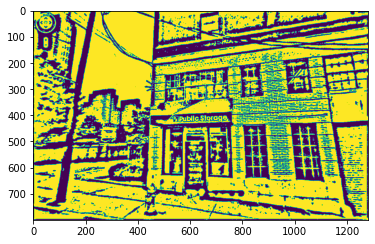

In [12]:
imshow(images[22])